In [1]:
from equpy import ChemicalReaction, EquationSystem
import numpy as np
import matplotlib.pyplot as plt
import time
np.seterr(invalid="ignore");


execution time --- 1.227292147549716 milliseconds ---



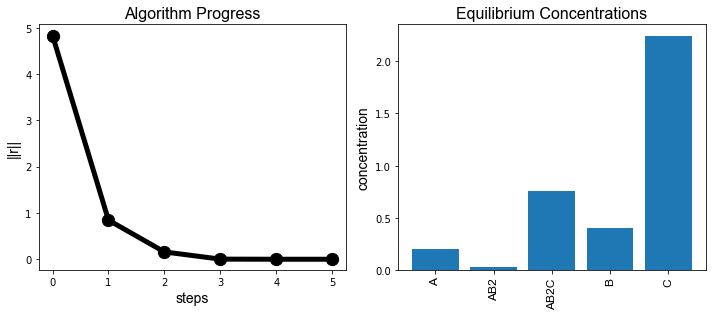

In [13]:
"""
Example #1: Manual input of reactions in symbolic form
"""
reactions = ['A + 2B = AB2',
    'AB2 + C = AB2C']

mass_conservation = ['A + AB2 + AB2C',
                'B + 2AB2 + 2AB2C',
                'C + AB2C']

K = [1, 10]
total_masses = [1,2,3]
eq_system = EquationSystem.from_literal_equations(reactions, mass_conservation)
reaction = ChemicalReaction(eq_system, K, total_masses)

start_time = time.time()
for j in range(100):
    x, delta = reaction.solve()
print("")
print("execution time --- %s milliseconds ---" % ((time.time() - start_time)/j*1000))
print("")

reaction.plotter()
plt.tight_layout()
plt.savefig('Figures/example_result.png', dpi=600, format='png')



execution time --- 0.8935952427411321 milliseconds ---



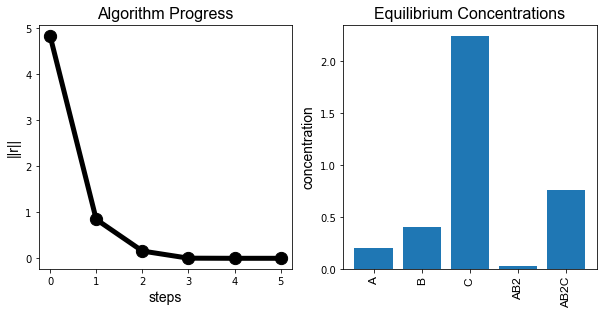

In [9]:
"""
Example #2: Manual input of reactions in matrix form
"""
stoichiometry = np.array([[-1, -2, 0, 1, 0],[0, 0, -1, -1, 1]])
K = np.array([1, 10])
total_masses = np.array([1, 2, 3])
mass_conservation = np.array([[1, 0, 0, 1, 1],[0, 1, 0, 2, 2],[0, 0, 1, 0, 1]])

eq_system = EquationSystem(stoichiometry, mass_conservation, {'A':0, 'B':1, 'C':2, 'AB2':3, 'AB2C':4})
reaction = ChemicalReaction(eq_system, K, total_masses)

start_time = time.time()
for j in range(100):
    x, delta = reaction.solve(iter = 20)
print("")
print("execution time --- %s milliseconds ---" % ((time.time() - start_time)/j*1000))
print("")

reaction.plotter()

In [14]:
x

array([0.20415617, 0.03403671, 0.76180712, 0.40831234, 2.23819288])


execution time --- 0.858010667743105 milliseconds ---



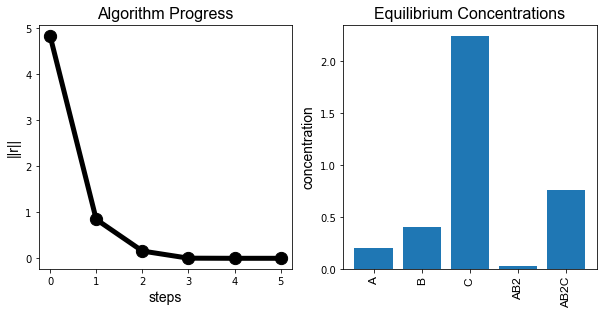

In [10]:
"""
Example #3: Loading reactions in matrix form from .csv files
"""

from utils import csv_loader

filename_N = 'MATLAB/stoichiometry_K.csv'
filename_C = 'MATLAB/mass_conservation_total_masses.csv'

stoichiometry, K, mass_conservation, total_masses = csv_loader(filename_N, filename_C)

eq_system = EquationSystem(stoichiometry, mass_conservation, {'A':0, 'B':1, 'C':2, 'AB2':3, 'AB2C':4})
reaction = ChemicalReaction(eq_system, K, total_masses)

start_time = time.time()
for i in range(100):
    x, delta = reaction.solve(iter = 20)
print("")
print("execution time --- %s milliseconds ---" % ((time.time() - start_time)/i*1000))
print("")

reaction.plotter()

In [14]:
"""
Testing and timing chempy performance on provided example.
"""

from chempy import Equilibrium
from chempy.chemistry import Species
from chempy.equilibria import EqSystem
from collections import defaultdict

water_autop = Equilibrium({'H2O'}, {'H+', 'OH-'}, 10**-14)  # unit "molar" assumed
ammonia_prot = Equilibrium({'NH4+'}, {'NH3', 'H+'}, 10**-9.24)  # same here
substances = [Species.from_formula(f) for f in 'H2O OH- H+ NH3 NH4+'.split()]
eqsys = EqSystem([water_autop, ammonia_prot], substances)
print('\n'.join(map(str, eqsys.rxns)))  # "rxns" short for "reactions"

init_conc = defaultdict(float, {'H2O': 1, 'NH3': 0.1})

start_time = time.time()
for i in range(100):
    x_chempy, sol, sane = eqsys.root(init_conc)
print("")
print("execution time --- %s milliseconds ---" % ((time.time() - start_time)/i*1000))
print("")

assert sol['success'] and sane
print(', '.join('%.2g' % v for v in x_chempy))


H2O = H+ + OH-; 1e-14
NH4+ = H+ + NH3; 5.75e-10

execution time --- 13.882535876649799 milliseconds ---

1, 0.0013, 7.6e-12, 0.099, 0.0013


<ipython-input-11-9a5d97cb9811>:20: UserWarning: Tolerance not reached. Manually check if the result is satisfying. Either change starting point, increase iterations and/or weight.
  x, delta = reaction.solve(iter = 20, w = 0.5)



execution time --- 2.0983464963681944 milliseconds ---



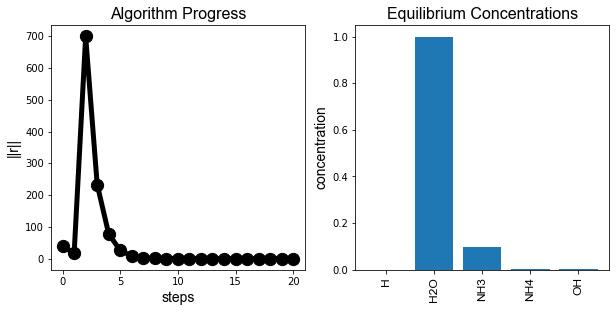

In [11]:
"""
Testing and timing equpy performance on chempy provided example.
Reactions in textual form.
"""
reactions = ['OH + H = H2O',
    'NH3 + H = NH4']

mass_conservation = ['H2O + OH',
                     'H2O + H + NH4',
                     'NH3 + NH4']

K = [1e14, 10**(9.24)]
total_masses = [1, 1, 0.1]

eq_system = EquationSystem.from_literal_equations(reactions, mass_conservation)
reaction = ChemicalReaction(eq_system, K, total_masses)

start_time = time.time()
for j in range(1000):
    x, delta = reaction.solve(iter = 20, w = 0.5)
print("")
print("execution time --- %s milliseconds ---" % ((time.time() - start_time)/j*1000))
print("")

reaction.plotter()

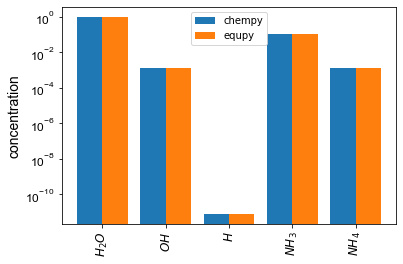

In [16]:
"""
Comparing chempy and equpy results for consistency
"""
x_equpy = np.array([x[1], x[4], x[0], x[2], x[3]])

plt.bar(np.arange(len(x)) - 0.2, x_chempy, 0.4, label='chempy')
plt.bar(np.arange(len(x)) + 0.2, x_equpy, 0.4, label='equpy')
plt.legend()
plt.yscale('log')
plt.ylabel("concentration", fontsize=14, fontname = 'Arial')
plt.yticks(fontsize=12, fontname = 'Arial')
plt.xticks(np.arange(0, 5), ['$H_2O$', '$OH$', '$H$', '$NH_3$', '$NH_4$'], fontsize=12, rotation=90, fontname = 'Arial');

plt.show()